# CIFAR100

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


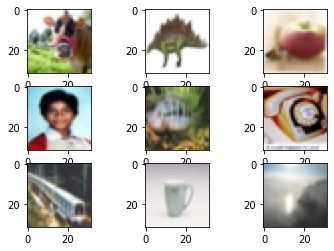

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               1573376   
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 512)               262656    
                                                                 
 dropout_21 (Dropout)        (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 512)               262656    
                                                                 
 dropout_22 (Dropout)        (None, 512)              

In [ ]:
from keras.datasets import cifar100
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from tensorflow.keras.utils import load_img,img_to_array,array_to_img
from tensorflow.keras.utils import to_categorical 
from matplotlib.pyplot import imshow

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i])
plt.show()

#x_train = x_train.reshape(50000,3072)
#x_test = x_test.reshape(10000,3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 128, epochs = 150, validation_split = 0.2)

Epoch 1/150
313/313 [==============================] - 19s 59ms/step - loss: 4.4065 - accuracy: 0.0338 - val_loss: 4.1376 - val_accuracy: 0.0572
Epoch 2/150
313/313 [==============================] - 18s 59ms/step - loss: 4.1241 - accuracy: 0.0614 - val_loss: 3.9904 - val_accuracy: 0.0824
Epoch 3/150
313/313 [==============================] - 18s 59ms/step - loss: 3.9902 - accuracy: 0.0816 - val_loss: 3.9184 - val_accuracy: 0.1051
Epoch 4/150
313/313 [==============================] - 18s 59ms/step - loss: 3.8869 - accuracy: 0.1013 - val_loss: 3.7874 - val_accuracy: 0.1238
Epoch 5/150
313/313 [==============================] - 18s 59ms/step - loss: 3.8154 - accuracy: 0.1109 - val_loss: 3.7119 - val_accuracy: 0.1395
Epoch 6/150
313/313 [==============================] - 18s 59ms/step - loss: 3.7627 - accuracy: 0.1186 - val_loss: 3.6696 - val_accuracy: 0.1520
Epoch 7/150
313/313 [==============================] - 18s 59ms/step - loss: 3.7291 - accuracy: 0.1266 - val_loss: 3.7663 - val_ac

In [ ]:
model.evaluate (x_train, y_train)
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

1563/1563 [==============================] - 12s 8ms/step - loss: 3.3789 - accuracy: 0.2020
Sai số:  3.5632121562957764
Độ chính xác:  0.16529999673366547


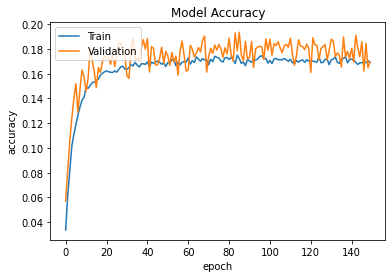

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model.save('./content/drive/MyDrive/AI_EXAM/Cifar100.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('./content/drive/MyDrive/AI_EXAM/Cifar100.h5')

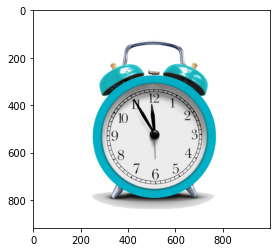

In [ ]:
plt.imshow(load_img('/content/drive/MyDrive/AI_TEST/dongho1.png'))

array([86])

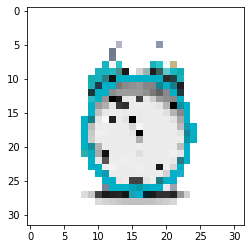

In [ ]:
from tensorflow.keras.models import load_model

filename = '/content/drive/MyDrive/AI_TEST/dongho1.png'
img=load_img(filename,target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)